In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
plot.prepare_for_plots()

Using cuda device


<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

# Uniform: distilling from 5-classes trainer

In [3]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'uniform')
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/uni_5_{i}.pt')

Model 10
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.662490 

Epoch 2
-------------------------------


Validation accuracy: 76.4%, Validation loss: 0.616032 

Epoch 3
-------------------------------


Validation accuracy: 76.8%, Validation loss: 0.602622 

Epoch 4
-------------------------------


Validation accuracy: 77.4%, Validation loss: 0.589798 

Epoch 5
-------------------------------


Validation accuracy: 77.8%, Validation loss: 0.584183 

Epoch 6
-------------------------------


Validation accuracy: 77.6%, Validation loss: 0.583070 

Epoch 7
-------------------------------


Validation accuracy: 77.8%, Validation loss: 0.580894 

Epoch 8
-------------------------------


Validation accuracy: 78.0%, Validation loss: 0.583074 

Epoch 9
-------------------------------


Validation accuracy: 78.1%, Validation loss: 0.578330 

Epoch 10
-------------------------------


Validation accuracy: 78.3%, Validation loss: 0.575848 

Epoch 11
-------------------------------


Validation accuracy: 78.4%, Validation loss: 0.574907 

Epoch 12
-------------------------------


Validation accuracy: 78.5%, Validation loss: 0.577542 

Epoch 13
-------------------------------


Validation accuracy: 78.5%, Validation loss: 0.579352 

Epoch 14
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.582715 

Epoch 15
-------------------------------


Validation accuracy: 78.9%, Validation loss: 0.585003 

Epoch 16
-------------------------------


Validation accuracy: 78.9%, Validation loss: 0.586123 

Epoch 17
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.591910 

Epoch 18
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.594188 

Epoch 19
-------------------------------


Validation accuracy: 78.9%, Validation loss: 0.599685 

Epoch 20
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.602452 

Epoch 21
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.608947 

Epoch 22
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.618639 

Epoch 23
-------------------------------


Validation accuracy: 78.7%, Validation loss: 0.625662 

Epoch 24
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.637290 

Epoch 25
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.648767 

Epoch 26
-------------------------------


Validation accuracy: 78.7%, Validation loss: 0.649249 

Epoch 27
-------------------------------


Validation accuracy: 78.6%, Validation loss: 0.650386 

Epoch 28
-------------------------------


Validation accuracy: 78.6%, Validation loss: 0.656034 

Epoch 29
-------------------------------


Validation accuracy: 78.9%, Validation loss: 0.659732 

Epoch 30
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.663750 



FSGM Accuracy [0.788, 0.7539, 0.7183, 0.6808, 0.6417, 0.6044, 0.564, 0.5297, 0.497, 0.4664]


Noise Accuracy [0.788, 0.786, 0.7841, 0.7769, 0.7693, 0.7562, 0.7319, 0.7187, 0.6875, 0.6805]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


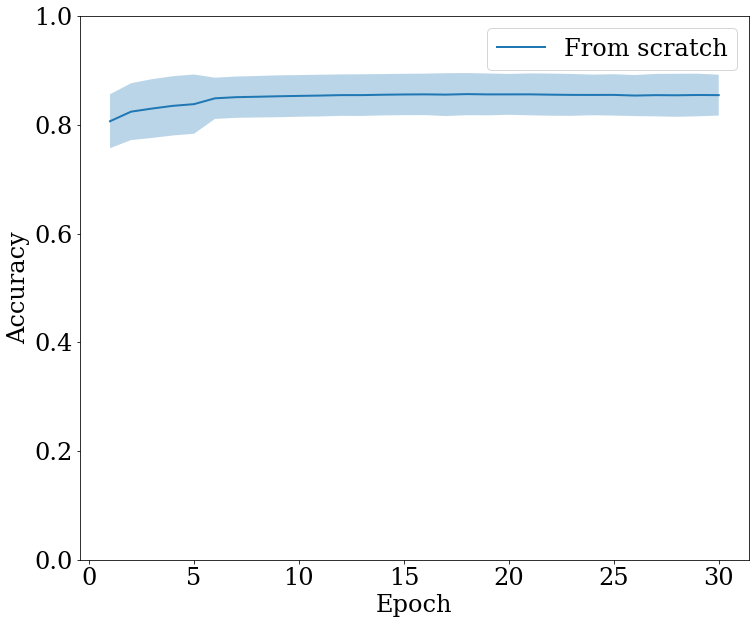

In [4]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

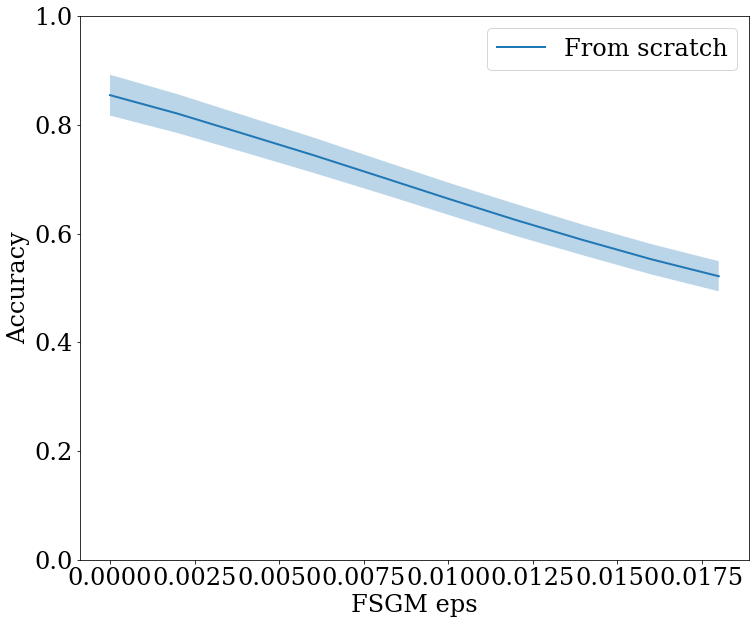

In [5]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

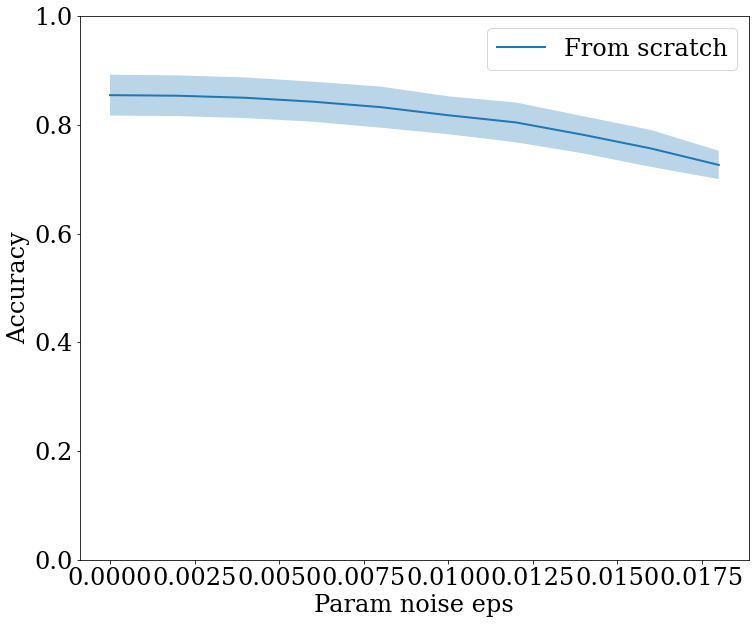

In [6]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [7]:
with open(pipeline.get_path()+'/history_5_uni.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
